In [1]:
#!pip install numpy
#!pip install pandas

In [2]:
#WORK ON GPLAY DATASET
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
#reading the data from csv file
df=pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#checking null values in dataset
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

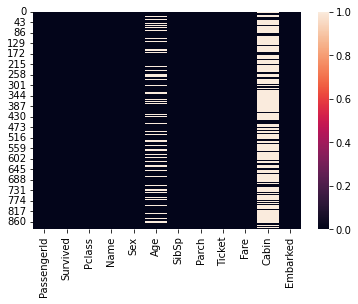

In [5]:
#visualizing the null values in dataset
sns.heatmap(df.isnull())
plt.show()

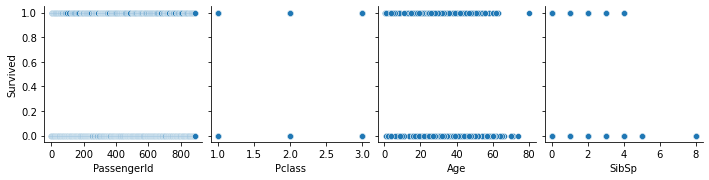

In [6]:
#scatter plot between inputs(passenger id,pclass,age,sbisb) and output(survived) column
sns.pairplot(df,x_vars=["PassengerId","Pclass","Age","SibSp"],y_vars="Survived",kind="scatter")
plt.show()

In [7]:
#checking the percentage of null values in given dataset
df.isnull().sum()/df.shape[0]*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [8]:
#droping "Cabin" column cause percentage of null values is more than 50%
df.drop("Cabin",axis=1,inplace=True)

In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [10]:
#comparing mean and median to identify if there is outliers or not in any columns
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
#cross checking data with dtype
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [12]:
#check the duplicate value in given datset
df.duplicated().sum()

0

In [14]:
#filling null values of Age columns with median() cause dtype is numeric and there are outliers
a=df["Age"].median()
df["Age"].fillna(a,inplace=True)


In [15]:
##filling null values of Embarked columns with mode() cause dtype is numeric and there are outliers
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [16]:
df["Embarked"].fillna("S",inplace=True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [17]:
#fetching 5 records of dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [18]:
#step 2:check duplicate rows
df.duplicated().sum()

0

In [19]:
df["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

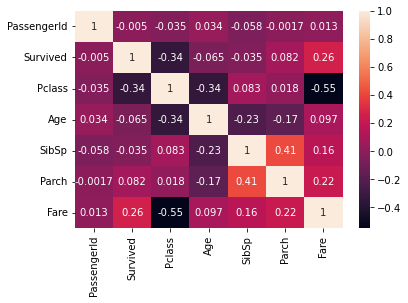

In [20]:
#checking the corelation between input and output
sns.heatmap(df.corr(),annot=True)
plt.show()

In [21]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


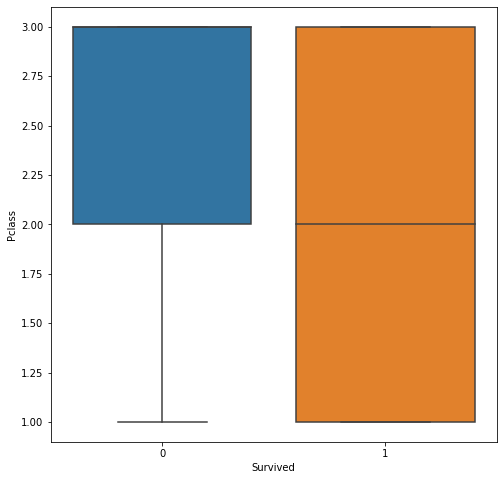

In [22]:
#creating a boxplot for target variable(Survived) with input variable(Pclass)
plt.figure(figsize=(8,8))
sns.boxplot(data=df,x="Survived",y="Pclass")
plt.show()

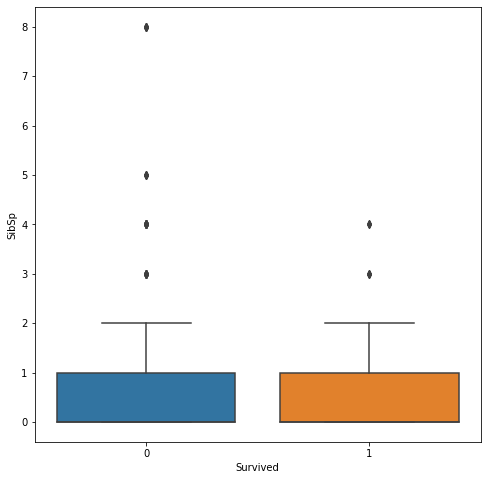

In [23]:
#creating a boxplot for target variable(Survived) with input variable(SibSp)
plt.figure(figsize=(8,8))
sns.boxplot(data=df,x="Survived",y="SibSp")
plt.show()

In [24]:
l=df[(df["Survived"]==0)&(df["SibSp"]>2)].index
l


Int64Index([  7,  16,  24,  27,  50,  59,  63,  71, 119, 159, 164, 171, 176,
            180, 182, 201, 229, 266, 278, 324, 374, 386, 409, 480, 485, 541,
            542, 634, 642, 683, 686, 787, 792, 813, 819, 824, 846, 850, 863],
           dtype='int64')

In [25]:
m=df[(df["Survived"]==1)&(df["SibSp"]>2)].index
m

Int64Index([68, 85, 88, 233, 261, 341, 726], dtype='int64')

In [26]:
df.drop(l,inplace=True)

In [27]:
df.drop(m,inplace=True)

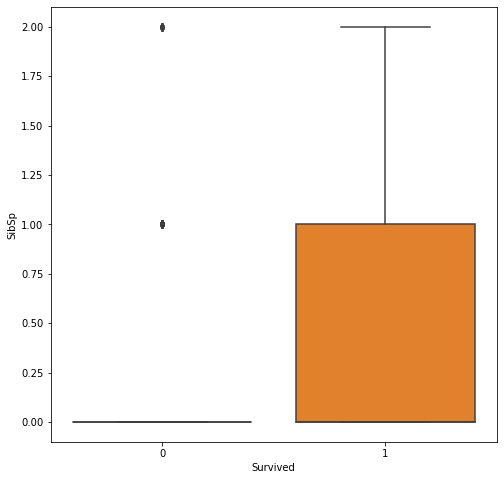

In [28]:
#creating a boxplot for target variable(Survived) with input variable(SibSp)
plt.figure(figsize=(8,8))
sns.boxplot(data=df,x="Survived",y="SibSp")
plt.show()

In [29]:
b=df[(df["Survived"]==0)&(df["SibSp"]>0)].index
b


Int64Index([  0,  13,  18,  34,  35,  38,  40,  41,  46,  48,
            ...
            748, 768, 783, 799, 817, 852, 854, 860, 861, 888],
           dtype='int64', length=112)

In [30]:
df.drop(b,inplace=True)

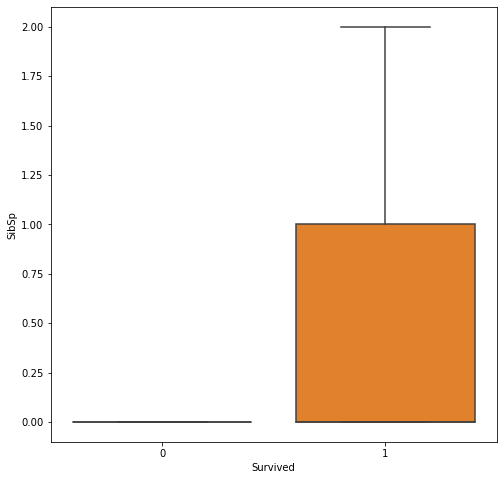

In [31]:
#creating a boxplot for target variable(Survived) with input variable(SibSp)
plt.figure(figsize=(8,8))
sns.boxplot(data=df,x="Survived",y="SibSp")
plt.show()

In [32]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q


In [33]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [34]:
#spliting dataset df in two parts 
#1st df hold all object typed data
#2nd one holds all numeric typed data
#1st df df_cat holds obj datatyped
df_cat=df.select_dtypes(object)
df_num=df.select_dtypes(["int64","float64"])

In [35]:
df_num.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
5,6,0,3,28.0,0,0,8.4583


In [36]:
df_num.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
dtype: object

In [37]:
#first df_cat converting intonumeric datatype
df_cat.head()

,Name,Sex,Ticket,Embarked
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S
4,"Allen, Mr. William Henry",male,373450,S
5,"Moran, Mr. James",male,330877,Q


In [38]:
df_cat["Sex"].value_counts()

male      469
female    264
Name: Sex, dtype: int64

In [39]:
df_cat["Ticket"].value_counts()

1601        7
PC 17757    4
2666        4
LINE        4
113760      4
           ..
2693        1
PC 17612    1
349233      1
349236      1
370376      1
Name: Ticket, Length: 623, dtype: int64

In [40]:
df_cat["Embarked"].value_counts()

S    517
C    150
Q     66
Name: Embarked, dtype: int64

In [41]:
df_cat.columns

Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')

In [42]:
#convert all categorical type data into number
from sklearn.preprocessing import LabelEncoder
for col in df_cat:
    #print(col)
    #create an object object of LabelEncoder
    le=LabelEncoder()
    df_cat[col]=le.fit_transform(df_cat[col])

In [43]:
df_cat.head()

,Name,Sex,Ticket,Embarked
1,154,0,544,0
2,282,0,614,2
3,219,0,48,2
4,12,1,433,2
5,450,1,252,1


In [44]:
df_cat.dtypes

Name        int32
Sex         int32
Ticket      int32
Embarked    int32
dtype: object

In [45]:
#to handle skewness on numeric cols
df_num.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
dtype: object

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
column name: PassengerId and skewness: -0.03307961575565659


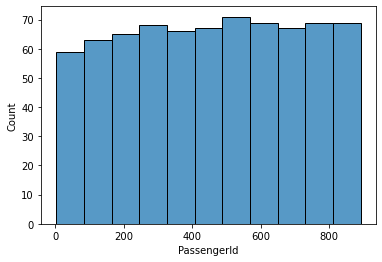

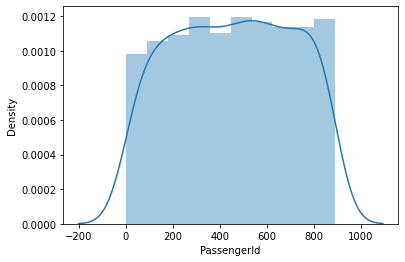

column name: Survived and skewness: 0.17288876053466964


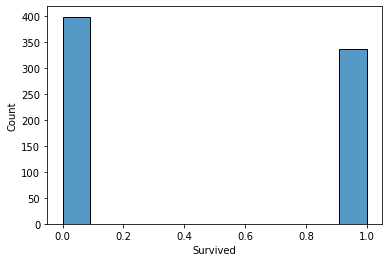

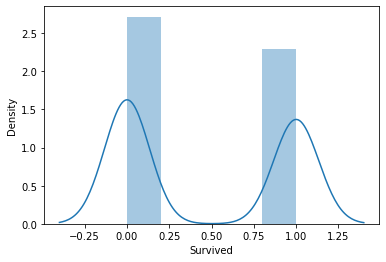

column name: Pclass and skewness: -0.5188236365925181


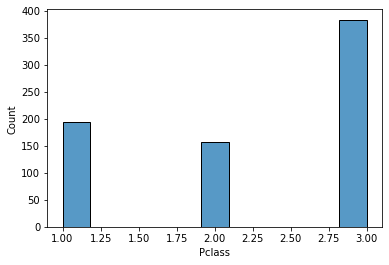

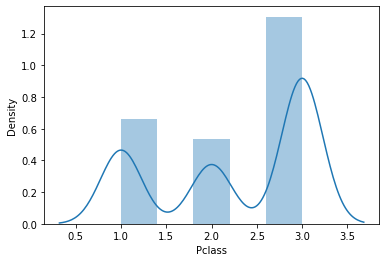

column name: Age and skewness: 0.606221472118531


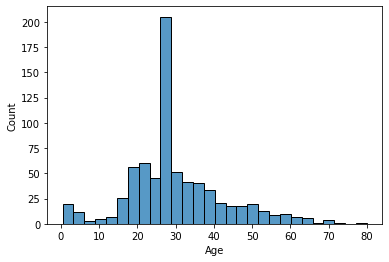

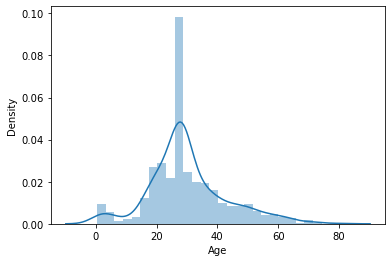

column name: SibSp and skewness: 2.227877654151988


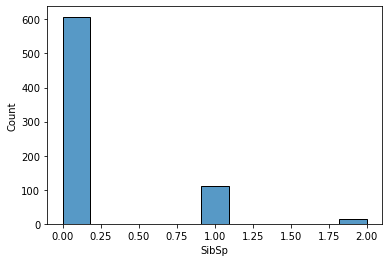

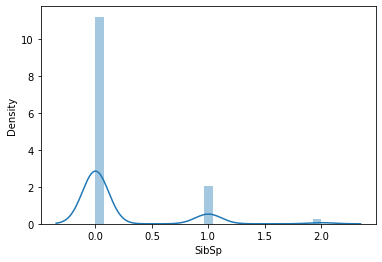

column name: Parch and skewness: 3.2536961723702884


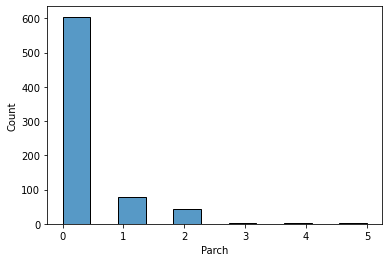

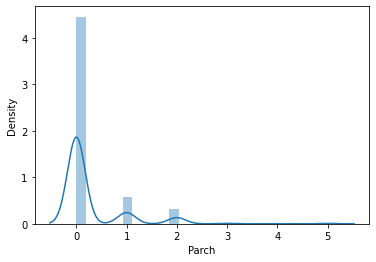

column name: Fare and skewness: 5.002625269469788


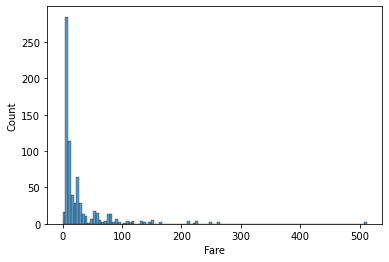

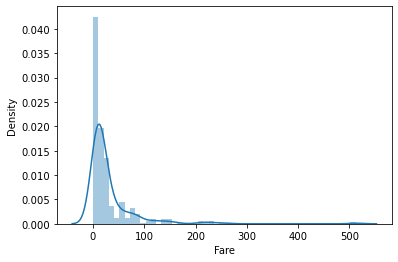

In [46]:
columns=df_num.columns
print(columns)
for col in columns:
    s=df_num[col].skew()
    print("column name: {} and skewness: {}".format(col,s))
    sns.histplot(df_num[col])
    plt.show()
    sns.distplot(df_num[col])
    plt.show()

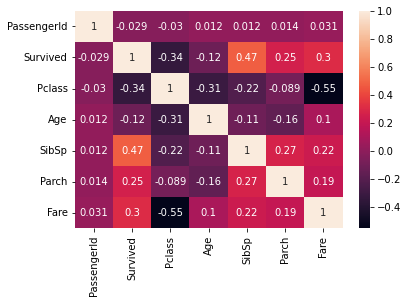

In [47]:
#check correlation between input and output
#here output price and rest are input
 #corr() inbuilt function , to find the correlation between
#2 variables
#if it is less than 0.5 than relation is bad
sns.heatmap(df_num.corr(),annot=True)
plt.show()

In [48]:
#fare and survived have bad relation with price
#checking null val in both cols
ans=0 #suppose
for i,v in enumerate(df_num["Fare"]):
    if v<0:
        ans=1
        print("negative value found")
        break  #exit the loop
        
if ans==0:
    print("no negative value found")

no negative value found


In [49]:
#parch and survied have bad relation with price
#checking null val in both cols
ans=0 #suppose
for i,v in enumerate(df_num["Parch"]):
    if v<0:
        ans=1
        print("negative value found")
        break  #exit the loop
        
if ans==0:
    print("no negative value found")

no negative value found


In [50]:
# sibsp and survived havebad relation with price
#checking null val in both cols
ans=0 #suppose
for i,v in enumerate(df_num["SibSp"]):
    if v<0:
        ans=1
        print("negative value found")
        break  #exit the loop
        
if ans==0:
    print("no negative value found")

no negative value found


In [51]:
#Apply Transformation on Fare,Parch and SibSp because skewness found
#on these columns and bad correlation between Fare,Parch and SibSp with output sibsp is bad 
#but also check -ve value found in above columns or not 
#if found -ve value on above columns then do not reduce skewness
#if there are no -ve values in any columns then reduce skewness
#transformation of those columns

In [52]:
#reducing skewness in fare,parch and sibsp
#2 types of transformation 1log() 2sqrt()
#log ans sqrt of -ve val null
np.log(-1),np.sqrt(-1)

(nan, nan)

In [53]:
#minimizing skewness of fare
df["Fare"]=np.sqrt(df["Fare"])

In [54]:
#minimizing skewness of parch
df["Parch"]=np.sqrt(df["Parch"])

In [55]:
#minimizing skewness of sibsp
df["SibSP"]=np.sqrt(df["SibSp"])

In [56]:
#check skewness
df["Fare"].skew()

2.1934024085086414

In [57]:
#check skewness
df["Parch"].skew()

2.0073415898324267

In [58]:
#check skewness
df["SibSp"].skew()

2.227877654151988

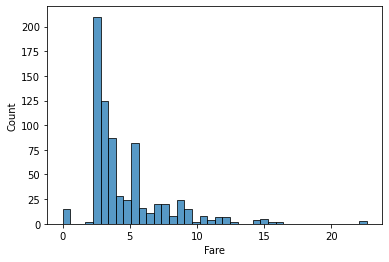

In [59]:
#histplots for columns where we reduced skewness
sns.histplot(df["Fare"])
plt.show()

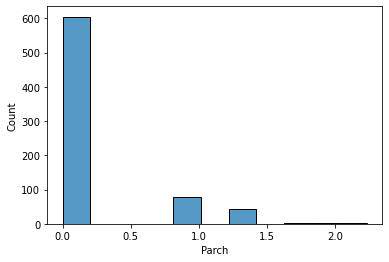

In [60]:
sns.histplot(df["Parch"])
plt.show()

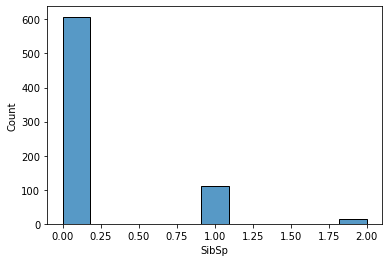

In [61]:
sns.histplot(df["SibSp"])
plt.show()

In [62]:
df_num

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
5,6,0,3,28.0,0,0,8.4583
...,...,...,...,...,...,...,...
885,886,0,3,39.0,0,5,29.1250
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
889,890,1,1,26.0,0,0,30.0000


In [63]:
#merging df_cat and df_num
#hold in new dataframe
df_new=pd.concat([df_cat,df_num],axis=1)
df_new.head()
#cancat() in built method of pandas,to join 2 or more column wise

,Name,Sex,Ticket,Embarked,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
1,154,0,544,0,2,1,1,38.0,1,0,71.2833
2,282,0,614,2,3,1,3,26.0,0,0,7.9250
3,219,0,48,2,4,1,1,35.0,1,0,53.1000
4,12,1,433,2,5,0,3,35.0,0,0,8.0500
5,450,1,252,1,6,0,3,28.0,0,0,8.4583


In [64]:
#select input and output from given data
x=df_new.drop("Survived",axis=1)   #input variables
x.columns
#droped only price col
y=df_new['Survived']   #output variable

In [65]:
#apply standard scaler on input col x
from sklearn.preprocessing import StandardScaler
#create an object for standardscaler class
ss=StandardScaler()
x=ss.fit_transform(x)  #convert into numpy 2d array
x

array([[-1.00189662, -1.33285976,  1.30602053, ...,  1.87066226,
        -0.39786445,  0.80079763],
       [-0.39697791, -1.33285976,  1.68710782, ..., -0.43386788,
        -0.39786445, -0.45050227],
       [-0.69471134, -1.33285976, -1.39425512, ...,  1.87066226,
        -0.39786445,  0.44168507],
       ...,
       [-0.59074093, -1.33285976, -1.57935466, ..., -0.43386788,
        -0.39786445, -0.01453026],
       [-1.44140788,  0.75026648, -1.61201929, ..., -0.43386788,
        -0.39786445, -0.01453026],
       [-0.88374844,  0.75026648,  0.66906034, ..., -0.43386788,
        -0.39786445, -0.45395845]])

In [ ]:
#now we can give data to the machine to train and test with different algorithms